<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/Group_Exercises_2_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training FFNN...
Training CNN...
Training RNN...
Training LSTM...


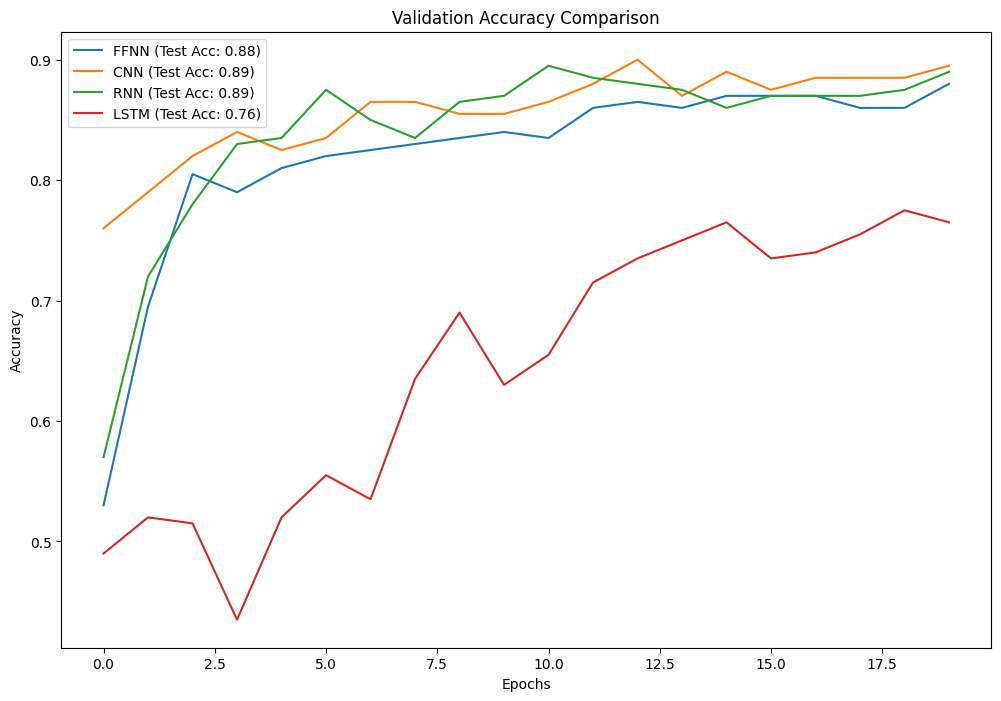

Best model: CNN with accuracy: 0.89


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, SimpleRNN, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# synthetic Data
def synth_data():
    X, y = make_classification(
        n_samples=1000,
        n_features=10,
        n_informative=8,
        n_classes=3,
        random_state=42
    )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = synth_data()
input_shape = X_train.shape[1:]
n_classes = y_train.shape[1]

# architectures

def build_ffnn(input_shape, n_classes):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    return model

def build_cnn(input_shape, n_classes):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_shape[0], 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    return model

def build_rnn(input_shape, n_classes):
    model = Sequential([
        SimpleRNN(64, activation='relu', input_shape=(input_shape[0], 1)),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    return model

def build_lstm(input_shape, n_classes):
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(input_shape[0], 1)),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    return model

# Training and evaluation

def train_and_evaluate(model, X_train, X_test, y_train, y_test, epochs=20):
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history, test_acc

# Reshape data for CNN, RNN, and LSTM
X_train_seq = np.expand_dims(X_train, axis=-1)
X_test_seq = np.expand_dims(X_test, axis=-1)

# Train models
models = {
    'FFNN': build_ffnn(input_shape, n_classes),
    'CNN': build_cnn((input_shape[0], 1), n_classes),
    'RNN': build_rnn((input_shape[0], 1), n_classes),
    'LSTM': build_lstm((input_shape[0], 1), n_classes)
}

results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name == 'FFNN':
        history, acc = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    else:
        history, acc = train_and_evaluate(model, X_train_seq, X_test_seq, y_train, y_test)
    results[model_name] = (history, acc)

# Visualize results

plt.figure(figsize=(12, 8))
for model_name, (history, acc) in results.items():
    plt.plot(history.history['val_accuracy'], label=f'{model_name} (Test Acc: {acc:.2f})')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Best-performing architecture
best_model = max(results.items(), key=lambda x: x[1][1])
print(f"Best model: {best_model[0]} with accuracy: {best_model[1][1]:.2f}")
